# Credit Card Attrition Analysis

## About
The goal of this analysis is to uncover factors associated with credit card customer attrition. Identifying and predicting patterns to provide actionable insights for reducing credit card customer churn.

### Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Load the dataset
data = pd.read_csv('../BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# Create copy of the dataset before starting analysis
data_clean = data.copy()

### Remove the last two columns
 It is advised to remove before doing any analysis

In [4]:
# Remove the last two columns which are not needed
data_clean.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)


In [5]:
data_clean.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
# Checking for data types
data_clean.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [8]:
# Checking for missing values
data_clean.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
# Filtering columns based on data types
col_object = data_clean.select_dtypes(include=['object']).columns
col_object

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [10]:
# Print unique variables in each column
for col in col_object:
    print(f"{col}")
    print(data_clean[col].unique(), "\n")

Attrition_Flag
['Existing Customer' 'Attrited Customer'] 

Gender
['M' 'F'] 

Education_Level
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate'] 

Marital_Status
['Married' 'Single' 'Unknown' 'Divorced'] 

Income_Category
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown'] 

Card_Category
['Blue' 'Gold' 'Silver' 'Platinum'] 



In [11]:
# Count occurence of "Unknown" in columns that data type is object
for col in data_clean.select_dtypes(include ='object'):
    count = (data_clean[col] == 'Unknown').sum()
    print(f"{col}: {count}")

# There are quite few Unknown in each column so instead of replacing the values, I decided to leave Unknown as it is to be a category in each column 


Attrition_Flag: 0
Gender: 0
Education_Level: 1519
Marital_Status: 749
Income_Category: 1112
Card_Category: 0


In [ ]:
# Check for duplicate
data_clean.duplicated().sum()

In [14]:
# Filtering columns based on data types
col_int = data_clean.select_dtypes(include=['int64']).columns
col_int

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct'],
      dtype='object')

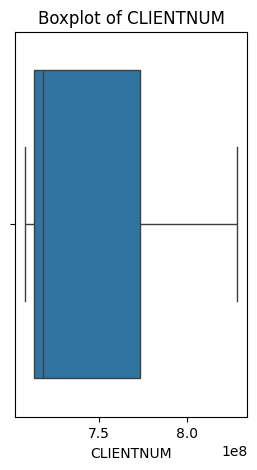

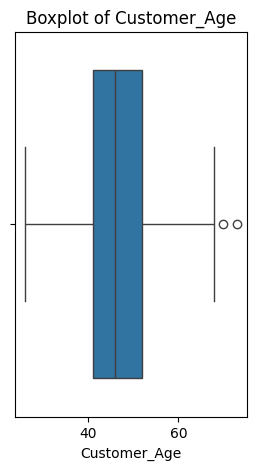

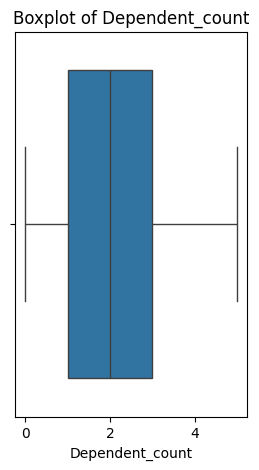

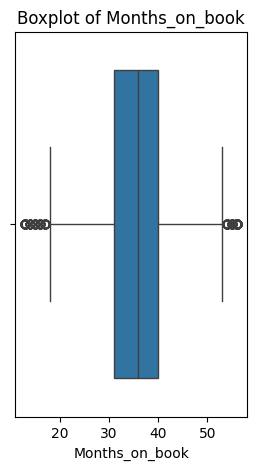

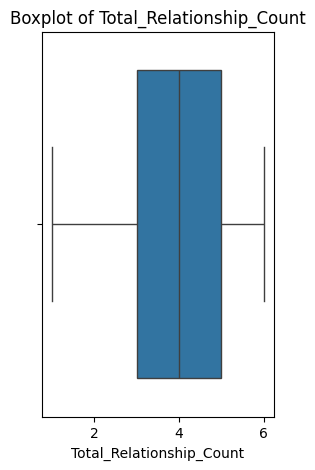

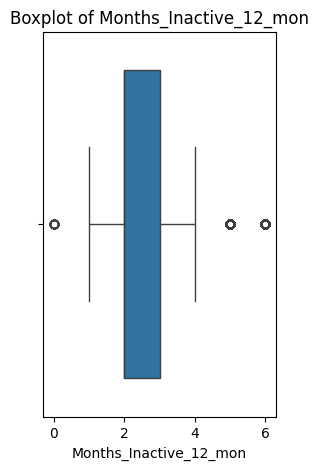

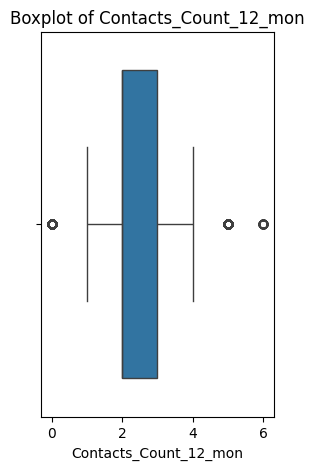

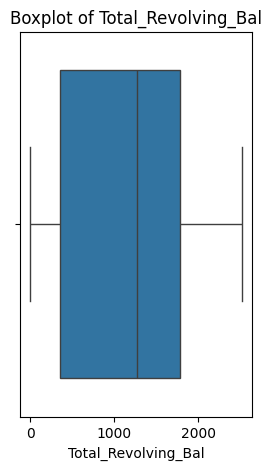

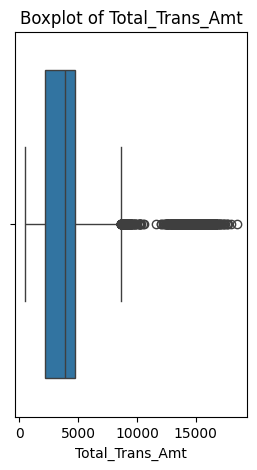

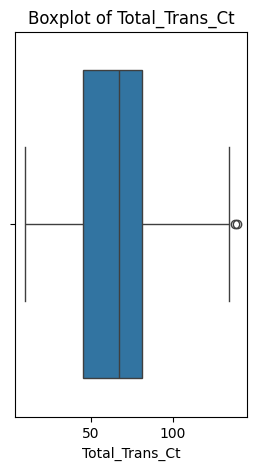

In [ ]:
# Check for outliers
for col in col_int:
    plt.figure(figsize =(3,5))
    sns.boxplot(x=data_clean[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [22]:
# Save cleaned data to csv
data_clean.to_csv('../cleaned_data.csv', index=False)

In [25]:
# Exploratory data analysis
selected_columns = ["Customer_Age", "Total_Revolving_Bal", "Total_Trans_Amt", "Credit_Limit","Attrition_Flag"]
data1 = data[selected_columns]
data1

,Customer_Age,Total_Revolving_Bal,Total_Trans_Amt,Credit_Limit,Attrition_Flag
0,45,777,1144,12691.0,Existing Customer
1,49,864,1291,8256.0,Existing Customer
2,51,0,1887,3418.0,Existing Customer
3,40,2517,1171,3313.0,Existing Customer
4,40,0,816,4716.0,Existing Customer
...,...,...,...,...,...
10122,50,1851,15476,4003.0,Existing Customer
10123,41,2186,8764,4277.0,Attrited Customer
10124,44,0,10291,5409.0,Attrited Customer
10125,30,0,8395,5281.0,Attrited Customer


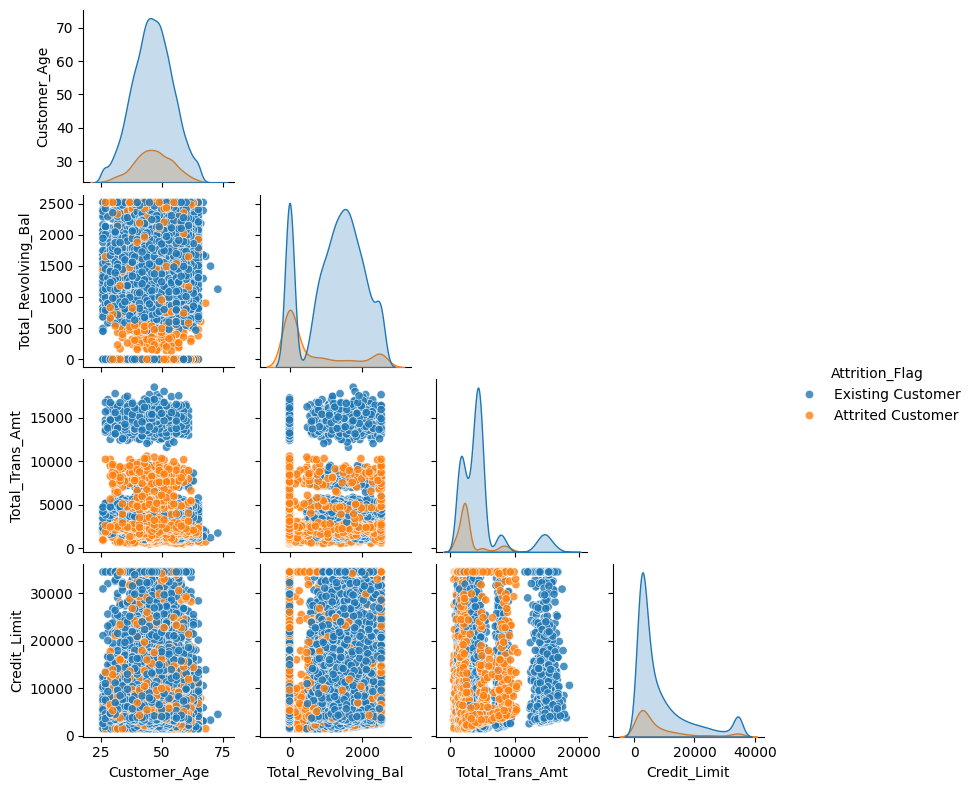

In [37]:
# Creating a pair plot
plot = sns.pairplot(data = data1, height=2, plot_kws={'alpha':0.8}, hue = 'Attrition_Flag');
for i, j in zip(*np.triu_indices_from(plot.axes,1)):
  plot.axes[i,j].set_visible(False)
plt.show()

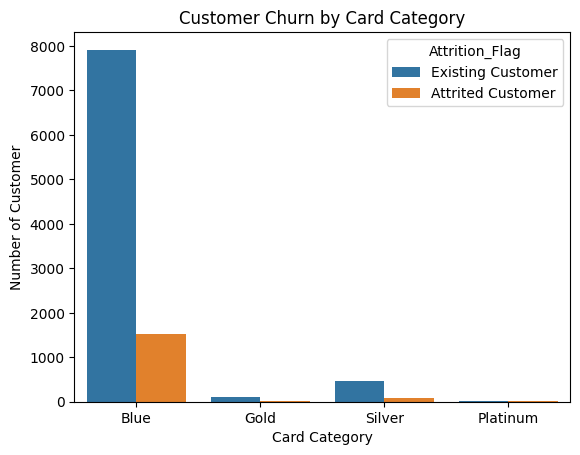

In [30]:
# Credit card category analysis
sns.countplot(data = data, x = 'Card_Category', hue = 'Attrition_Flag')
plt.title("Customer Churn by Card Category")
plt.ylabel("Number of Customer")
plt.xlabel("Card Category")
plt.show()

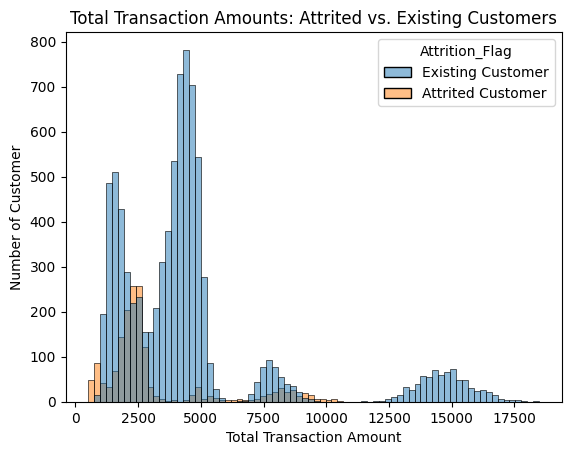

In [29]:
# Histgram for Total transaction amount
sns.histplot(data = data_clean, x = 'Total_Trans_Amt', hue = 'Attrition_Flag')
plt.title('Total Transaction Amounts: Attrited vs. Existing Customers')
plt.ylabel("Number of Customer")
plt.xlabel("Total Transaction Amount")
plt.show()

### The hypothesis 1 & 2 are supported by the data.
1. Customers with lower card categories are more likely to churn.
2. The lower the total transaction amount, the higher their likelihood of churning.

Here, I check whether the combined effect of the two variables still supports the hypothesis.


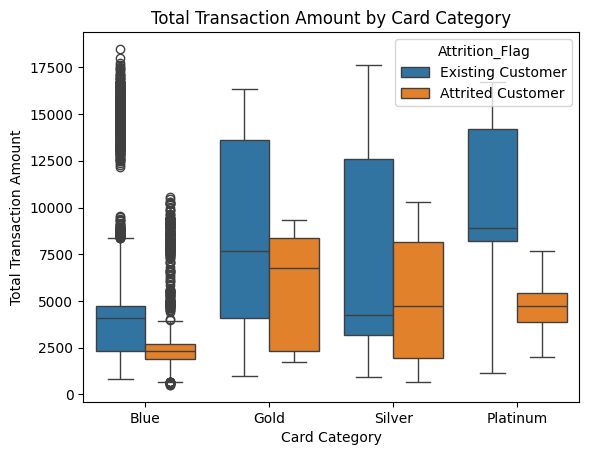

In [56]:
sns.boxplot(data = data_clean, y = 'Total_Trans_Amt', x = 'Card_Category', hue ='Attrition_Flag')
plt.ylabel('Total Transaction Amount')
plt.xlabel('Card Category')
plt.title('Total Transaction Amount by Card Category')
plt.show()

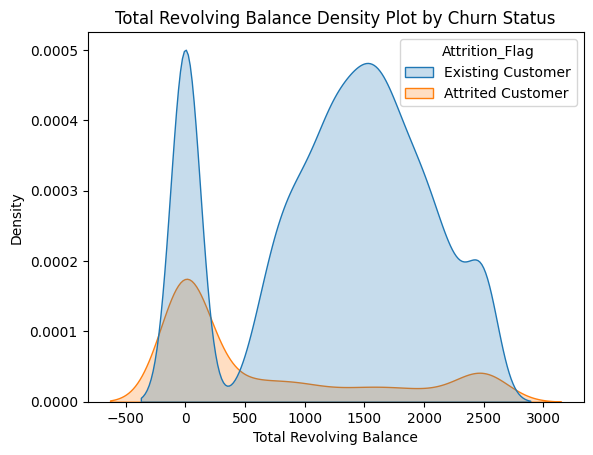

In [55]:
sns.kdeplot(data =data_clean, hue ='Attrition_Flag', x='Total_Revolving_Bal', fill =True)
plt.title('Total Revolving Balance Density Plot by Churn Status')
plt.xlabel('Total Revolving Balance')
plt.show()